In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Question 1

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


<function matplotlib.pyplot.show(close=None, block=None)>

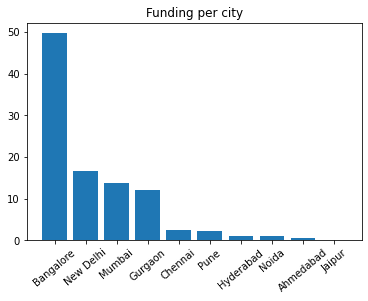

In [6]:
df=pd.read_csv(r'G:\Coding ninjas\Data Science & Machine Learning\Milestone 6\startup_funding.csv', encoding='utf-8')

df['CityLocation'].fillna("unknown", inplace=True)
a=df[df['CityLocation']=="unknown"].index
df.drop(a, inplace=True)

def separateCity(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace('bangalore', 'Bangalore', inplace=True)
df['CityLocation'].replace('Delhi', 'New Delhi', inplace=True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(',', "")))
df['AmountInUSD'] = pd.to_numeric(df['AmountInUSD'])

funding_amount = df.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
city=funding_amount.index
amount=funding_amount.values
amount_per_city = np.true_divide(amount, amount.sum())*100

for i in range(len(city)):
    print(city[i], format(amount_per_city[i], '.2f'))
    
    
plt.xticks(rotation=40)    
plt.bar(city, amount_per_city)
plt.title('Funding per city')
plt.show

    

# Question 2

                       0
Sequoia Capital       64
Accel Partners        53
Kalaari Capital       44
SAIF Partners         41
Indian Angel Network  40


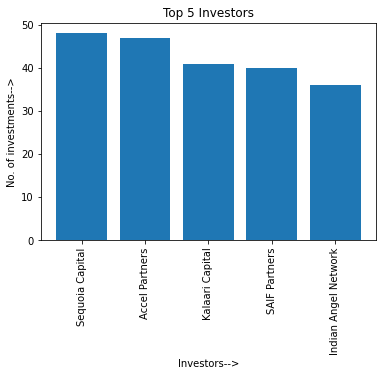

In [6]:
df=pd.read_csv(r'G:\Coding ninjas\Data Science & Machine Learning\Milestone 6\startup_funding.csv', encoding='utf-8')

df['InvestorsName'].fillna('unk' ,inplace=True)
a=df[df['InvestorsName']=="unk"].index
df.drop(a, inplace=True)

def createDictionary(arr):
    d={}
    for i in arr:
        if ',' not in i:
                d[i]=d.get(i,0)+1
        else:
            string=i.strip().split(',')
            for j in string:
                d[j.strip()] = d.get(j.strip(), 0)+1
    return d  

d=createDictionary(df['InvestorsName'])
d=dict(sorted(d.items(), key=lambda x:x[1], reverse=True))

datafr = pd.DataFrame(list(d.values()), list(d.keys()))
ans=datafr[0:5]
print(ans)

investors=[]
num_of_investments=[]

for i in range(len(ans)):
    investors.append(ans.index[i])
    num_of_investments.append(ans.values[i])
    

plt.bar(investors, num_of_companies)
plt.xlabel("Investors-->")
plt.ylabel("No. of investments-->")
plt.title("Top 5 Investors")
plt.xticks(rotation = 90)
plt.show()

# Question 3

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


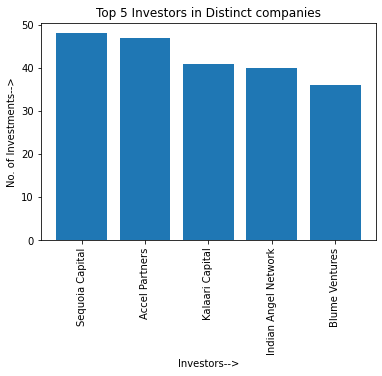

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


In [10]:

file_obj = open(r'G:\Coding ninjas\Data Science & Machine Learning\Milestone 6\startup_funding.csv', encoding='utf-8') 
file_data = csv.DictReader(file_obj, skipinitialspace = True)

d = {} 
for row in file_data:
    if row["StartupName"] == "Ola Cabs" or row["StartupName"] == "Olacabs":
        row["StartupName"] = "Ola"
    if row["StartupName"] == "Flipkart.com":
        row["StartupName"] = "Flipkart"
    if row["StartupName"] == "Oyo Rooms" or row["StartupName"] == "OyoRooms" or row["StartupName"] == "Oyorooms" or row["StartupName"] == "OYO Rooms":
        row["StartupName"] = "Oyo"
    if row["StartupName"] == "Paytm Marketplace":
        row["StartupName"] = "Paytm"
 
    value = row["InvestorsName"].split(",")
    for i in range(len(value)):
        value[i] = value[i].strip()
    for i in value:
        if(row["StartupName"] != None) and i != "" and i != "Undisclosed Investors" and i != "Undisclosed investors" :
            if i in d:
                d[i].add(row["StartupName"])
            else:
                d[i] = set()
                d[i].add(row["StartupName"])

for i in d.keys(): 
    d[i] = len(d[i])

d1=dict(sorted(d.items(), key=lambda x:x[1], reverse=True))

datafr = pd.DataFrame(list(d1.values()), list(d1.keys()))
ans=datafr[0:5]

for i in range(len(ans)):
    print(ans.index[i], ans.values[i][0])


investors=[]
num_of_companies=[]

for i in range(len(ans)):
    investors.append(ans.index[i])
    num_of_companies.append(ans.values[i][0])
    
 
plt.bar(investors, num_of_companies)
plt.xlabel("Investors-->")
plt.ylabel("No. of Investments-->")
plt.title("Top 5 Investors in Distinct companies")
plt.xticks(rotation = 90)

plt.show()

for i in investors:
    print(i,d[i])
    


# Question 4

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


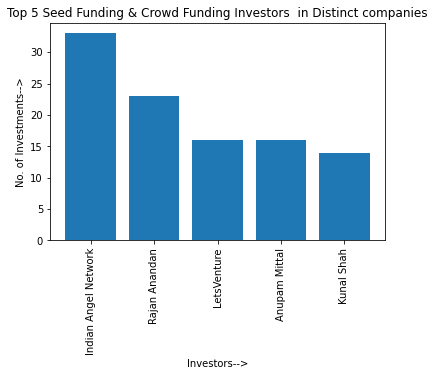

In [9]:
file_obj = open(r'G:\Coding ninjas\Data Science & Machine Learning\Milestone 6\startup_funding.csv', encoding='utf-8') 
file_data = csv.DictReader(file_obj, skipinitialspace = True)

d={}
for row in file_data:
    
    if row["StartupName"] == "Ola Cabs" or row["StartupName"] == "Olacabs":
        row["StartupName"] = "Ola"
    if row["StartupName"] == "Flipkart.com":
        row["StartupName"] = "Flipkart"
    if row["StartupName"] == "Oyo Rooms" or row["StartupName"] == "OyoRooms" or row["StartupName"] == "Oyorooms" or row["StartupName"] == "OYO Rooms":
        row["StartupName"] = "Oyo"
    if row["StartupName"] == "Paytm Marketplace":
        row["StartupName"] = "Paytm"
        
    if row['InvestmentType'] =='PrivateEquity':
        row['InvestmentType'] = 'Private Equity'
    if row['InvestmentType'] == 'SeedFunding':
        row['InvestmentType'] = 'Seed Funding'
    if row['InvestmentType'] == 'Crowd funding':
        row['InvestmentType'] = 'Crowd Funding'
        
    
    value = row['InvestorsName'].split(',')
    for i in range(len(value)):
        value[i]=value[i].strip()                                                                                                                                                          
    for i in value:
        if row['StartupName'] !=None and i!="" and i != 'Undisclosed Investors' and i != 'Undisclosed investors' and (row['InvestmentType']=='Seed Funding' or row['InvestmentType']=='Crowd Funding'):
            if i in d:
                d[i].add(row['StartupName'])
            else:
                d[i]=set()
                d[i].add(row['StartupName'])
                
    
for i in d.keys():
    d[i]=len(d[i])
    
d1=dict(sorted(d.items(), key=lambda x:x[1], reverse=True))

datafr = pd.DataFrame(list(d1.values()), list(d1.keys()))
ans=datafr[0:5]

for i in range(len(ans)):
    print(ans.index[i], ans.values[i][0])


investors=[]
no_of_companies=[]

for i in range(len(ans)):
    investors.append(ans.index[i])
    no_of_companies.append(ans.values[i][0])
    
    

plt.xlabel("Investors-->")
plt.ylabel("No. of Investments-->")
plt.title("Top 5 Seed Funding & Crowd Funding Investors  in Distinct companies")
plt.xticks(rotation=90)
plt.bar(investors, no_of_companies)
plt.show()



# Question 5

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


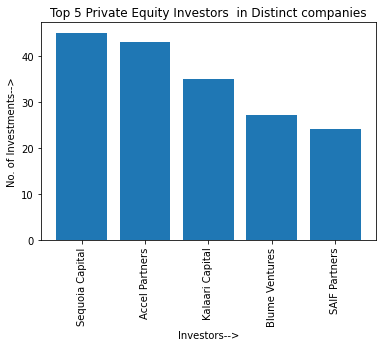

In [7]:
file_obj = open(r'G:\Coding ninjas\Data Science & Machine Learning\Milestone 6\startup_funding.csv', encoding='utf-8') 
file_data = csv.DictReader(file_obj, skipinitialspace = True)

d={}
for row in file_data:
    
    if row["StartupName"] == "Ola Cabs" or row["StartupName"] == "Olacabs":
        row["StartupName"] = "Ola"
    if row["StartupName"] == "Flipkart.com":
        row["StartupName"] = "Flipkart"
    if row["StartupName"] == "Oyo Rooms" or row["StartupName"] == "OyoRooms" or row["StartupName"] == "Oyorooms" or row["StartupName"] == "OYO Rooms":
        row["StartupName"] = "Oyo"
    if row["StartupName"] == "Paytm Marketplace":
        row["StartupName"] = "Paytm"
        
    if row['InvestmentType'] =='PrivateEquity':
        row['InvestmentType'] = 'Private Equity'
    if row['InvestmentType'] == 'SeedFunding':
        row['InvestmentType'] = 'Seed Funding'
    if row['InvestmentType'] == 'Crowd funding':
        row['InvestmentType'] = 'Crowd Funding'
        
    
    value = row['InvestorsName'].split(',')
    for i in range(len(value)):
        value[i]=value[i].strip()                                                                                                                                                          
    for i in value:
        if row['StartupName'] !=None and i!="" and i != 'Undisclosed Investors' and i != 'Undisclosed investors' and row['InvestmentType']=='Private Equity':
            if i in d:
                d[i].add(row['StartupName'])
            else:
                d[i]=set()
                d[i].add(row['StartupName'])
                
    
for i in d.keys():
    d[i]=len(d[i])
    
d1=dict(sorted(d.items(), key=lambda x:x[1], reverse=True))

datafr = pd.DataFrame(list(d1.values()), list(d1.keys()))
ans=datafr[0:5]

for i in range(len(ans)):
    print(ans.index[i], ans.values[i][0])


investors=[]
no_of_companies=[]

for i in range(len(ans)):
    investors.append(ans.index[i])
    no_of_companies.append(ans.values[i][0])
    
    

plt.xlabel("Investors-->")
plt.ylabel("No. of Investments-->")
plt.title("Top 5 Private Equity Investors  in Distinct companies")
plt.xticks(rotation=90)
plt.bar(investors, no_of_companies)
plt.show()